In [4]:
from transformers import ViltProcessor, ViltForQuestionAnswering
import requests
import os

In [2]:
images_paths = os.listdir("src/images/helicopter")
len(images_paths)

82

In [6]:
from PIL import Image
# prepare image + question
images = [PIL.Image.open("src/images/helicopter/"+img_path) for img_path in images_paths]
text = "What is shown in this image?"


In [7]:
print(model.config.id2label)
list(model.config.id2label.values()).index("helicopter")
# 3 and 9

NameError: name 'model' is not defined

In [8]:

processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")


In [9]:

# prepare inputs
encoding = processor(images, [text]*len(images), return_tensors="pt")

# forward pass
outputs = model(**encoding)
logits = outputs.logits


In [10]:
res = logits.detach().numpy()

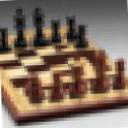

-12.459288
keyboard
YES


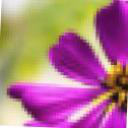

-12.256825
flower
YES


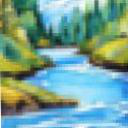

-10.267526
stairs
YES


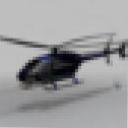

-4.398459
luggage
YES


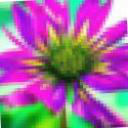

-11.675673
flower
YES


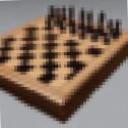

-10.838722
keyboard
YES


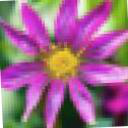

-12.371897
flower
YES


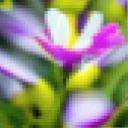

-12.555462
flower
NO


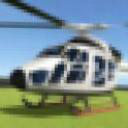

-1.0517769
helicopter
YES


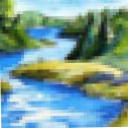

-12.734051
bus
YES


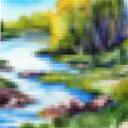

-11.344585
bus
YES


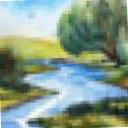

-13.851807
road
NO


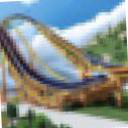

-11.792676
train
YES


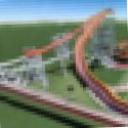

-10.577338
train
NO


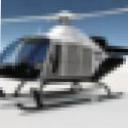

-5.4785385
fire hydrant
YES


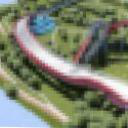

-11.070189
train
YES


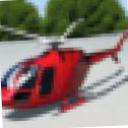

-3.9289293
fire truck
YES


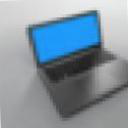

-12.727777
laptop
YES


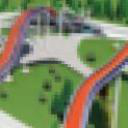

-12.182758
scissors
YES


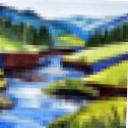

-12.786711
bridge
NO


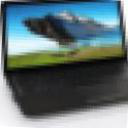

-8.540906
plane
YES


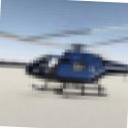

-0.13239063
helicopter
YES


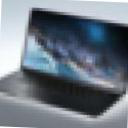

-11.539988
laptop
YES


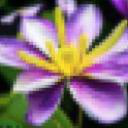

-12.579439
flower
YES


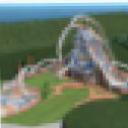

-9.571307
bridge
YES


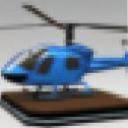

0.55747974
helicopter
YES


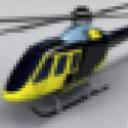

-13.32558
train
YES


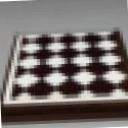

-13.964316
food
YES


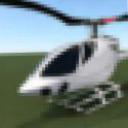

1.6537647
helicopter
NO


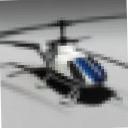

-4.414297
plane
YES


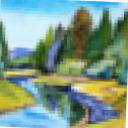

-11.827038
water
YES


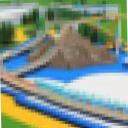

-10.074543
pool
YES


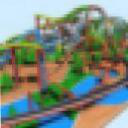

-9.863285
water
YES


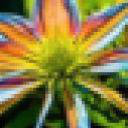

-11.511273
flower
YES


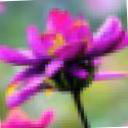

-12.029795
flower
YES


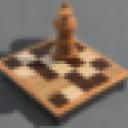

-9.4895735
lego
YES


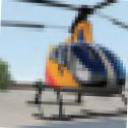

-4.378805
train
YES


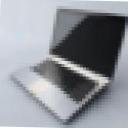

-10.43886
laptop
YES


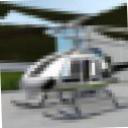

-3.3600714
plane
YES


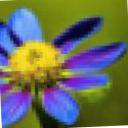

-12.555988
flower
YES


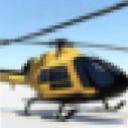

-1.3605442
train
YES


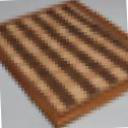

-12.642099
mat
NO


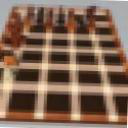

-12.895317
keyboard
NO


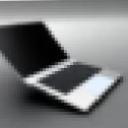

-11.777838
phone
YES


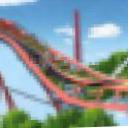

-10.959921
bridge
YES


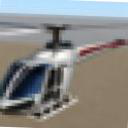

-2.292694
helicopter
NO


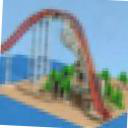

-9.923872
ferris wheel
YES


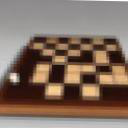

-14.919382
keyboard
NO


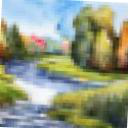

-11.191005
trees
NO


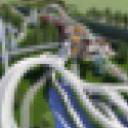

-9.947226
train
NO


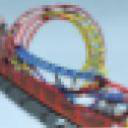

-10.206137
train
YES


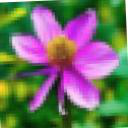

-12.325453
flower
YES


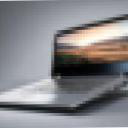

-13.775512
tv
YES


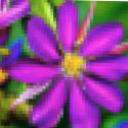

-12.853794
flower
NO


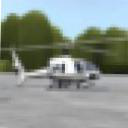

-7.8217783
truck
YES


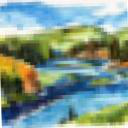

-9.396259
water
YES


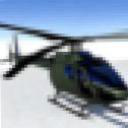

-11.050997
train
YES


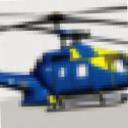

-4.486191
train
YES


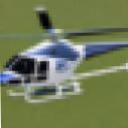

0.30527794
helicopter
YES


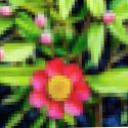

-12.558988
flower
YES


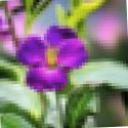

-12.650272
flower
YES


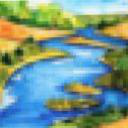

-13.71805
bus
NO


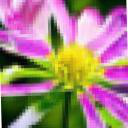

-11.012595
flower
YES


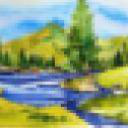

-13.281645
trees
NO


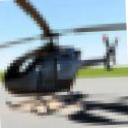

-3.3415132
fire hydrant
YES


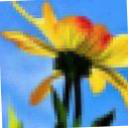

-12.356658
flower
YES


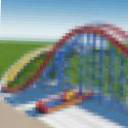

-10.502899
bridge
YES


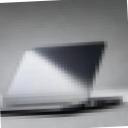

-15.074319
laptop
YES


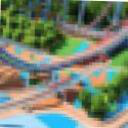

-11.956562
bus
YES


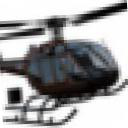

-8.879795
clock
YES


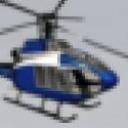

1.3562437
helicopter
YES


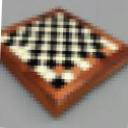

-15.190943
food
NO


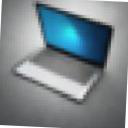

-11.045613
laptop
YES


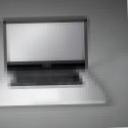

-13.321862
computer
YES


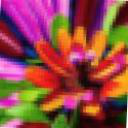

-8.975991
flower
YES


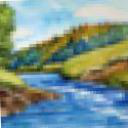

-12.123429
bridge
NO


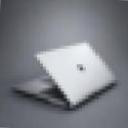

-11.781098
laptop
YES


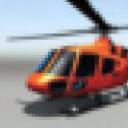

1.1766821
helicopter
YES


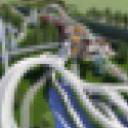

-9.947223
train
NO


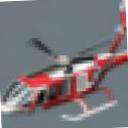

-0.3918996
helicopter
YES


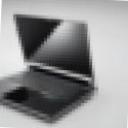

-13.452635
laptop
YES


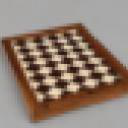

-12.790657
keyboard
NO


In [13]:
from IPython.display import Image, display

for i, image in enumerate(images_paths):
    display(Image(filename="src/images/helicopter/"+image))
    print(res[i][2132])
    print(model.config.id2label[res[i].argmax(-1)   ])
    if res[i][3] > res[i][9]:
        print("YES")
    else:
        print("NO")


In [ ]:
print("PRED:", model.config.id2label[idx])
print("YES:", res[3])
print("NO:", res[9])

if res[3] > res[9]:
    print("YES")
else:
    print("NO")



PRED: no
YES: -2.2328787
NO: 3.4467368
NO
